# 수업을 위한 사전 세팅

In [1]:
#구글 drive 연결
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#작업을 수행할 디렉토리로 이동하기기
%cd gdrive/MyDrive/AIED_CON

/content/gdrive/MyDrive/AIED_CON


In [3]:
#필요한 패키지 다운받기기
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 h

# 구글 크롤링

In [8]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

'''
아래의 세 개의 변수를 바꿔주면서 셀을 반복해서 돌리면 데이터를 수집할 수 있다.
keyword : 구글에 검색할 keyword
path : 이미지를 저장할 폴더명(mammal, reptile, bird, fish)
max_num : 저장할 이미지의 개수
count : image를 덮어씌우지 않게 지금까지 저장한 count로 계속 수정해주면서 저장장
'''
keyword = "개구리"
path = "reptile"
max_num = 20
count = 1

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)
# 로컬 환경에서는 위의 코드를 주석처리하고 아래의 코드를 사용
# 로컬 환경에서 활용하면 크롤링을 시각적으로 확인할 수 있음
# driver = webdriver.Chrome('chromedriver')
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl")
elem = driver.find_element(By.NAME, "q")
elem.send_keys(keyword)
elem.send_keys(Keys.RETURN)

images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
#최대 개수만큼만 이미지 뽑기. 최대 개수보다 이미지 개수가 적은 경우 이미지 개수만큼 추출
if len(images) > max_num :
    images = images[:max_num]
    
for image in images:
#찾은 이미지들 저장하기, 저작권 문제로 이미지 저장이 안되는 경우 그냥 넘기기기
    try : 
        image.click()
        time.sleep(3)
        imageURL = driver.find_element(By.CSS_SELECTOR, ".n3VNCb.KAlRDb").get_attribute("src")
        urllib.request.urlretrieve(imageURL, "labeleddata/"+path+"/"+str(count)+".jpg")
        count +=1
    except:
          pass

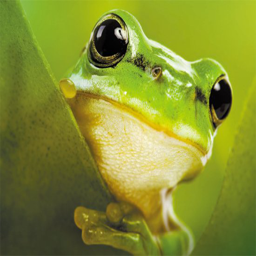

In [10]:
#크롤링한 이미지 예시 보기(RGB)
from PIL import Image
image = Image.open("labeleddata/reptile/1.jpg")
image = image.resize((256,256)).convert("RGB")
image

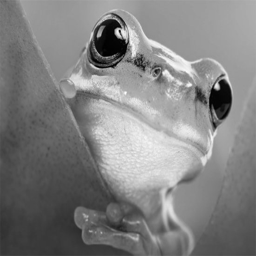

In [11]:
#크롤링한 이미지 예시 보기(흑백)
image = image.convert("L")
image

# Kaggle을 통한 데이터 수집